In [172]:
!pip install -r requirements.txt

In [173]:
import pandas as pd

In [174]:
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")

### Analisi dei dati

In [175]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2604,15583049,Wallace,643,Germany,Female,34,7,160426.07,1,0,1,188533.11,0
1,5125,15612140,Milano,721,Spain,Female,46,7,137933.39,1,1,1,67976.57,0
2,6789,15800268,Costa,825,Germany,Male,37,6,118050.79,1,0,1,52301.15,0
3,9338,15797751,Pai,466,Germany,Female,47,5,102085.72,1,1,1,183536.24,1
4,7480,15671987,Meagher,567,Spain,Male,35,8,153137.74,1,1,0,88659.07,0


In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        6400 non-null   int64  
 1   CustomerId       6400 non-null   int64  
 2   Surname          6400 non-null   object 
 3   CreditScore      6400 non-null   int64  
 4   Geography        6400 non-null   object 
 5   Gender           6400 non-null   object 
 6   Age              6400 non-null   int64  
 7   Tenure           6400 non-null   int64  
 8   Balance          6400 non-null   float64
 9   NumOfProducts    6400 non-null   int64  
 10  HasCrCard        6400 non-null   int64  
 11  IsActiveMember   6400 non-null   int64  
 12  EstimatedSalary  6400 non-null   float64
 13  Exited           6400 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 700.1+ KB


In [177]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [178]:
train.shape

(6400, 14)

In [179]:
for item in train.columns:
    print(item)
    print (train[item].unique())

RowNumber
[2604 5125 6789 ...  415 1802 7608]
CustomerId
[15583049 15612140 15800268 ... 15810432 15774931 15638751]
Surname
['Wallace' 'Milano' 'Costa' ... 'Maggard' 'Korff' 'Moseley']
CreditScore
[643 721 825 466 567 717 691 502 474 495 683 668 519 768 644 590 637 735
 656 652 687 743 513 544 580 665 699 693 797 782 685 552 713 516 748 524
 828 672 711 599 627 813 696 716 484 719 674 605 521 738 658 598 453 694
 611 594 510 581 562 677 709 806 850 707 758 742 613 684 660 587 791 533
 710 539 802 775 807 551 608 561 812 692 623 650 574 645 820 555 675 767
 727 606 616 781 633 798 470 615 663 550 676 412 512 465 817 705 596 749
 778 682 704 688 614 725 653 607 619 507 662 701 712 784 493 757 631 803
 671 730 584 667 635 557 787 746 579 569 766 733 464 762 724 756 640 543
 785 462 505 811 655 498 609 657 504 770 585 542 517 718 808 520 741 753
 647 604 425 624 386 612 577 670 634 714 720 483 537 695 739 571 603 630
 641 726 442 690 732 601 636 527 629 597 792 554 430 595 468 788 659 578

In [180]:
train.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Viene effettuato il replace dei valori della colonna Gender in modo tale da avere dei valori numerici

In [181]:
train = train.replace('Female', 0)
train = train.replace('Male',1)
test = test.replace('Male', 1)
test = test.replace('Female', 0)

In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        6400 non-null   int64  
 1   CustomerId       6400 non-null   int64  
 2   Surname          6400 non-null   object 
 3   CreditScore      6400 non-null   int64  
 4   Geography        6400 non-null   object 
 5   Gender           6400 non-null   int64  
 6   Age              6400 non-null   int64  
 7   Tenure           6400 non-null   int64  
 8   Balance          6400 non-null   float64
 9   NumOfProducts    6400 non-null   int64  
 10  HasCrCard        6400 non-null   int64  
 11  IsActiveMember   6400 non-null   int64  
 12  EstimatedSalary  6400 non-null   float64
 13  Exited           6400 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 700.1+ KB


In [183]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2604,15583049,Wallace,643,Germany,0,34,7,160426.07,1,0,1,188533.11,0
1,5125,15612140,Milano,721,Spain,0,46,7,137933.39,1,1,1,67976.57,0
2,6789,15800268,Costa,825,Germany,1,37,6,118050.79,1,0,1,52301.15,0
3,9338,15797751,Pai,466,Germany,0,47,5,102085.72,1,1,1,183536.24,1
4,7480,15671987,Meagher,567,Spain,1,35,8,153137.74,1,1,0,88659.07,0


### Viene utilizzato il label encoder per effettuare l'encoding dei valori della colonna 'Geography' in modo tale anche qui da avere dei valori numerici 

In [184]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
train['Geography'] = labelEncoder.fit_transform(train['Geography'])
test['Geography'] = labelEncoder.fit_transform(test['Geography'])

In [185]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2604,15583049,Wallace,643,1,0,34,7,160426.07,1,0,1,188533.11,0
1,5125,15612140,Milano,721,2,0,46,7,137933.39,1,1,1,67976.57,0
2,6789,15800268,Costa,825,1,1,37,6,118050.79,1,0,1,52301.15,0
3,9338,15797751,Pai,466,1,0,47,5,102085.72,1,1,1,183536.24,1
4,7480,15671987,Meagher,567,2,1,35,8,153137.74,1,1,0,88659.07,0


### Si decide di eliminare la colonna 'Surname' non considerata utile ai fini della classificazione

In [186]:
train = train.drop(["Surname"], axis = 1)
test = test.drop(["Surname"], axis = 1)

In [187]:
train.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2604,15583049,643,1,0,34,7,160426.07,1,0,1,188533.11,0
1,5125,15612140,721,2,0,46,7,137933.39,1,1,1,67976.57,0
2,6789,15800268,825,1,1,37,6,118050.79,1,0,1,52301.15,0
3,9338,15797751,466,1,0,47,5,102085.72,1,1,1,183536.24,1
4,7480,15671987,567,2,1,35,8,153137.74,1,1,0,88659.07,0


### Si utilizzano le heat map per verificare le correlazioni tra le varie features e la colonna 'Exited'. Una correlazione molto bassa ci suggerisce di eliminare la colonna. Utilizziamo le heat map anche per verificare eventuali correlazioni tra feature

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def heat_map():
    correlation = train.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(correlation, square=True,annot=True,cmap='cubehelix')
    plt.title('Correlation between different features')

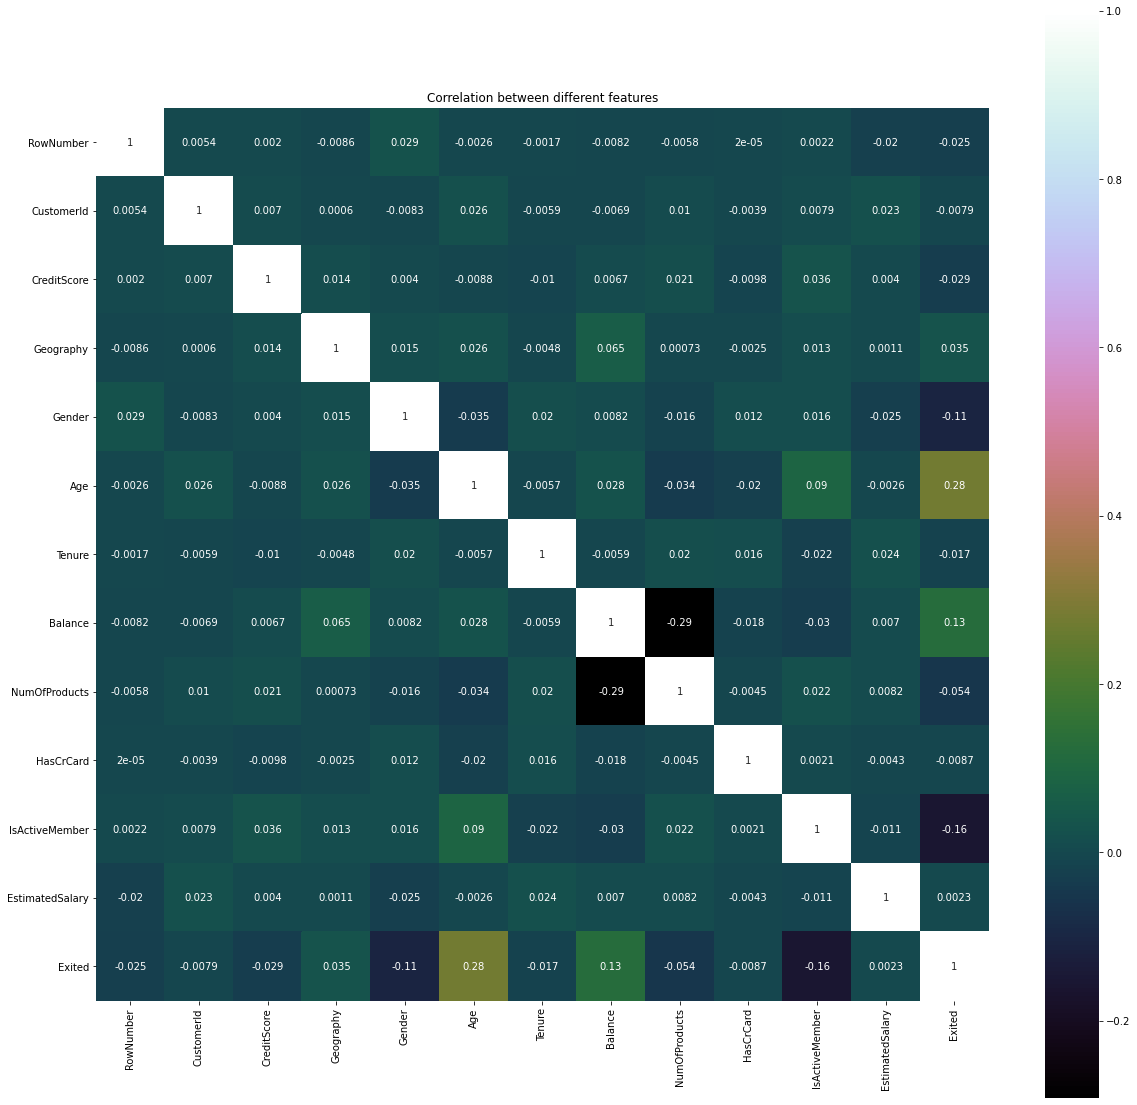

In [189]:
heat_map()

### Guardando la heat map si nota come la colonna 'RowNumber' e 'CustomerId' possono essere droppate

In [190]:
train = train.drop(["RowNumber", "CustomerId"], axis = 1)
test = test.drop(["RowNumber", "CustomerId"], axis = 1)

### Venogno visualizzati dei countplot per vedere le relazioni tra alcune feature e la colonna 'Exited'. Le feature non ritenute significative allora potranno non essere considerate (droppando la colonna).

<AxesSubplot:xlabel='Geography', ylabel='count'>

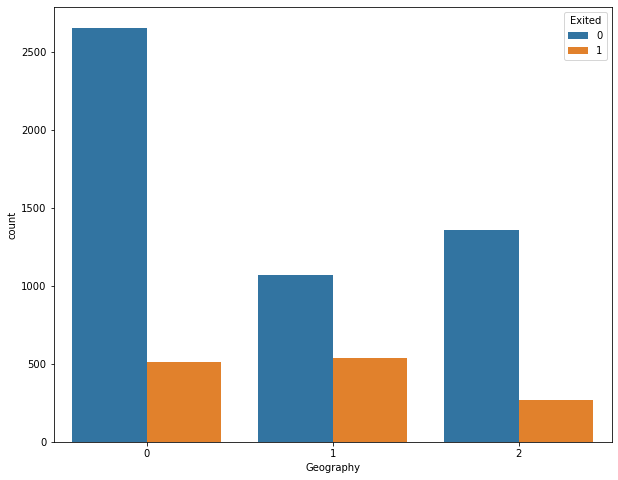

In [191]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='Geography', hue = 'Exited',data = train)

<AxesSubplot:xlabel='Gender', ylabel='count'>

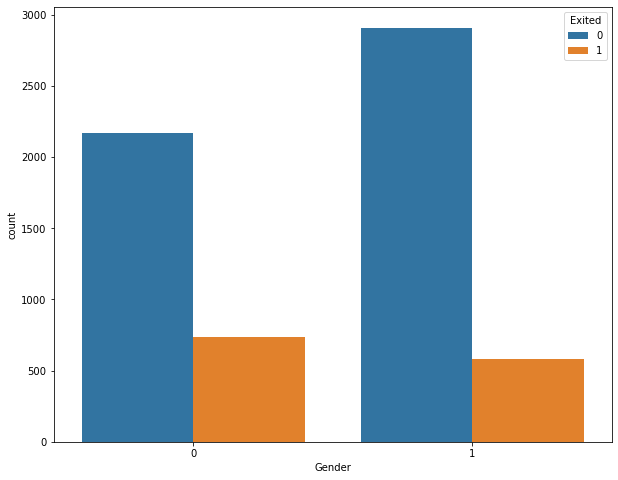

In [192]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='Gender', hue = 'Exited',data = train)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

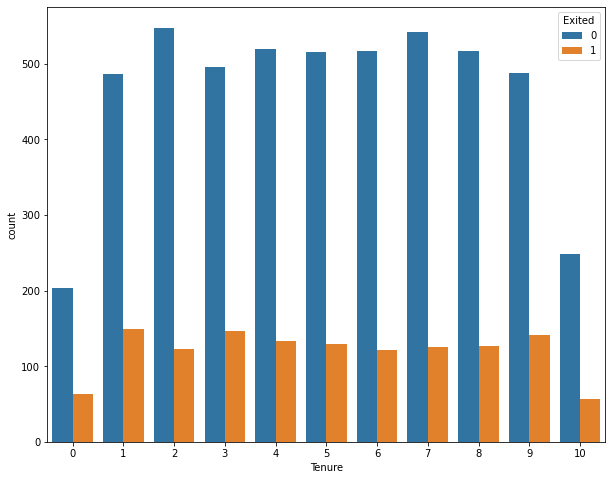

In [193]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='Tenure', hue = 'Exited',data = train)

In [194]:
train = train.drop(["Tenure"], axis = 1)
test = test.drop(["Tenure"], axis = 1)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

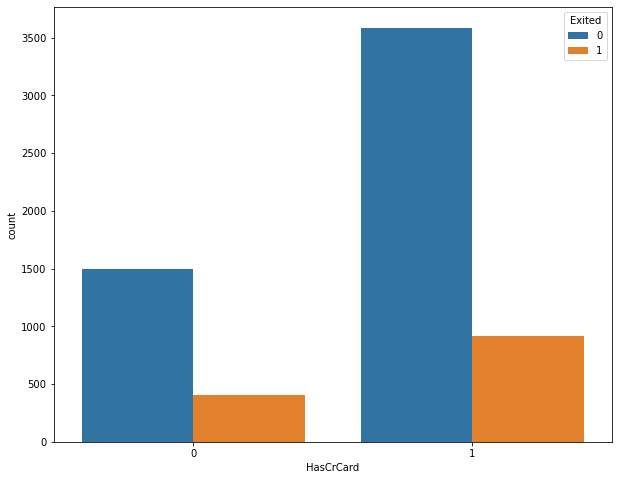

In [195]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='HasCrCard', hue = 'Exited',data = train)

In [196]:
train = train.drop(["HasCrCard"], axis = 1)
test = test.drop(["HasCrCard"], axis = 1)

In [197]:
train.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,643,1,0,34,160426.07,1,1,188533.11,0
1,721,2,0,46,137933.39,1,1,67976.57,0
2,825,1,1,37,118050.79,1,1,52301.15,0
3,466,1,0,47,102085.72,1,1,183536.24,1
4,567,2,1,35,153137.74,1,0,88659.07,0


<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

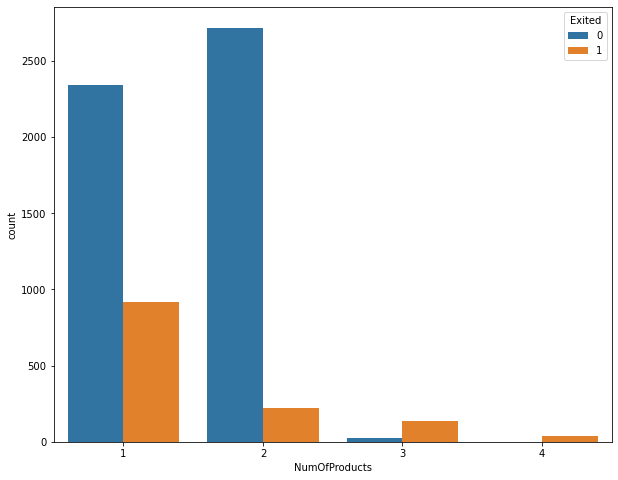

In [198]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='NumOfProducts', hue = 'Exited',data = train)

### Costruzione e Fit dei modelli: Decision Tree, Logistic e Random Forest

In [199]:
y_train = train["Exited"].copy()
X_train = train.drop("Exited",axis=1).copy()

y_test = test["Exited"].copy()
X_test = test.drop("Exited",axis=1).copy()

In [200]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
trainedtree = model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Decision Tree Classifier")
print("accuracy score:", accuracy_score(y_test, pred)*100)
print("model score:", model.score(X_test, y_test))

Decision Tree Classifier
accuracy score: 85.0
model score: 0.85


In [201]:
from sklearn.linear_model  import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
pred = logistic_model.predict(X_test)
print("Logistic Regression")
print("accuracy score:", accuracy_score(y_test, pred)*100)
print("model score:", logistic_model.score(X_test, y_test))

Logistic Regression
accuracy score: 79.5
model score: 0.795


In [202]:
from sklearn.ensemble import RandomForestClassifier
randomForest_model = RandomForestClassifier(n_estimators=100)
randomForest_model.fit(X_train,y_train)
y_pred = randomForest_model.predict(X_test)
print("Random forest")
print("accuracy score:", accuracy_score(y_test, y_pred))
print("model score:", randomForest_model.score(X_test, y_test))

Random forest
accuracy score: 0.86375
model score: 0.86375
